In [358]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [302]:
df = pd.read_csv('/home/mikhail/it-academy/модуль 2/Практическая часть/descriptive_stats/clients.csv')
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [303]:
df = df.rename({'Customer ID':'Customer','Age Interval ':'Age_Interval','Type of property':'Type_of_property','Area (ft.)':'Area','Age at time of purchase':'Age_at_time_of_purchase'},axis = 1)
# Добавил колонку форматированный Price для сравнения цены с другими атрибутами
df['Price_formating'] = df['Price'].str.replace('$','').str.strip().str.replace(',','').astype('float64')
df['Area_kvm'] = df['Area']* 0.09290304
df.head()

/tmp/ipykernel_82589/811442121.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price_formating'] = df['Price'].str.replace('$','').str.strip().str.replace(',','').astype('float64')


,ID,Building,Year of sale,Month of sale,Type_of_property,Property number,Area,Price,Status,Customer,...,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source,Price_formating,Area_kvm
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,21.0,F,USA,California,Home,5,No,Website,246172.68,69.035320
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,24.0,F,USA,California,Home,5,No,Website,246331.90,70.254208
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,27.0,M,USA,California,Home,1,Yes,Client,209280.91,54.560097
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,27.0,M,USA,California,Investment,3,Yes,Website,452667.01,149.086153
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,15.0,F,USA,California,Home,4,No,Agency,467083.31,127.783486


In [304]:
df.shape # посмотрел сколько строк и колонок

(195, 27)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type_of_property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area                     195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer                 195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age_at_time_of_purchase  178 non-null    float64
 14  Age_Interval             1

In [391]:
df.describe()

,ID,Building,Year of sale,Month of sale,Property number,Area,Age_at_time_of_purchase,Y,M,D,Deal satisfaction,Price_formating,Area_kvm
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000,195.000000,195.000000
mean,2591.425641,2.564103,2006.333333,7.271795,27.328205,899.867128,46.151685,1960.325843,6.752809,15.449438,3.605128,269434.560923,83.600392
std,1244.617996,1.243434,1.072941,3.378674,14.830832,261.489550,12.841692,12.835575,3.450312,8.457285,1.363355,80129.094465,24.293174
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.710000,19.000000,1931.000000,1.000000,1.000000,1.000000,117564.070000,38.156208
25%,2003.500000,2.000000,2006.000000,4.000000,15.000000,739.860000,37.000000,1950.250000,4.000000,8.000000,3.000000,212393.250000,68.735243
50%,2054.000000,2.000000,2007.000000,8.000000,27.000000,785.480000,45.000000,1962.000000,6.000000,15.000000,4.000000,243052.590000,72.973480
75%,3048.500000,3.000000,2007.000000,10.000000,39.000000,1075.460000,55.000000,1969.750000,9.750000,23.750000,5.000000,308550.875000,99.913503
max,5051.000000,5.000000,2010.000000,12.000000,59.000000,1942.500000,76.000000,1986.000000,15.000000,31.000000,5.000000,529317.280000,180.464155


(178, 27)

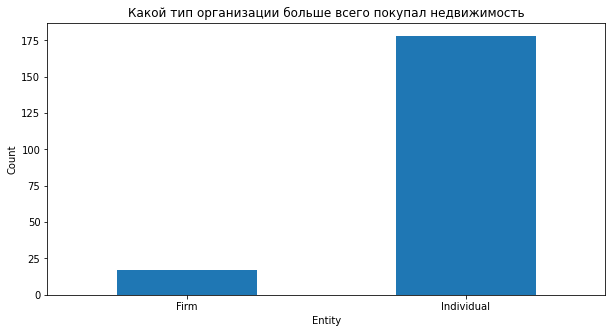

In [410]:
# какой тип организации больше всего покупают недвижимость
df_Entity_count = df.groupby('Entity').count()['ID']
ax = df_Entity_count.plot(kind='bar', rot=0, figsize=(10,5))
ax.set_title('Какой тип организации больше всего покупал недвижимость')
ax.set_xlabel('Entity')
ax.set_ylabel('Count')
#Мы видим, что больше недвижимости покупают Individual
Entity = df.groupby('Entity').count()['ID'].idxmax() # Individual
df_entity = df.drop(df[df.Entity == 'Firm'].index,inplace=False)
df_entity.shape

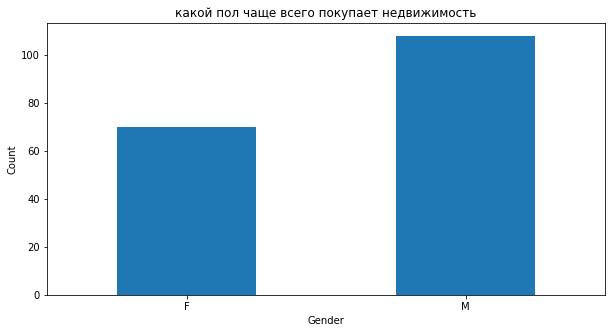

In [409]:
# какое количество мужчин и женщин покупают недвижимость
df_gender_count = df_entity.groupby('Gender').count()['ID']
ax = df_gender_count.plot(kind='bar', rot=0, figsize=(10,5))
ax.set_title('какой пол больше всего покупает недвижимость')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
#Мы видим, что больше недвижимости покупают мужчины. Первый наш атрибут портрета это пол "M"
gender = df_entity.groupby('Gender').count()['ID'].idxmax() # пол M
#Поскольку мужчины чаще совершают сделки я оставлю в датафрейме только мужчин и далее буду использовать df_man
df_man = df_entity.drop(df_entity[df_entity.Gender == 'F'].index,inplace=False)

41.0

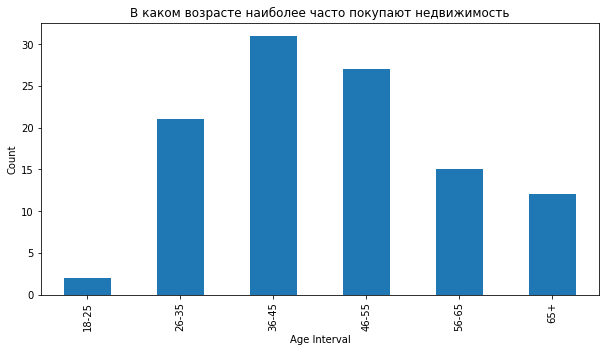

In [408]:
# какой возрастной диапазон и количество совершенных сделок
df_Age_Interval_count = df_man.groupby('Age_Interval').count()['ID']
ax = df_Age_Interval_count.plot(kind='bar', figsize=(10,5))
ax.set_title('В каком возрасте наиболее часто покупают недвижимость')
ax.set_xlabel('Age Interval')
ax.set_ylabel('Count')
#Наибольшее количество сделок совершается мужчинами в возрасте 36-45 лет. В датафрейме оставлю только мужчин в возрасте 36-45 лет и далее буду использовать df_man_36_45_age
df_man_36_45_age  = df_man.drop(df_man[df_man.Age_Interval != '36-45'].index,inplace=False)
median_age = df_man_36_45_age['Age_at_time_of_purchase'].median()
median_age # Средний возраст


'Apartment'

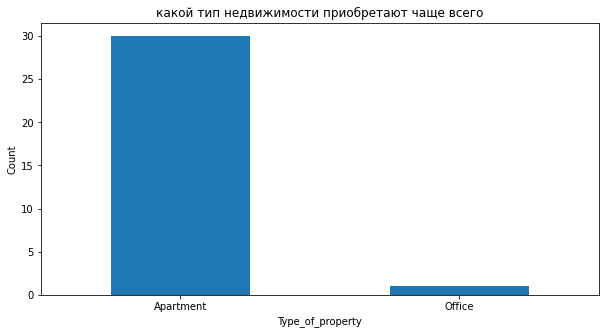

In [407]:
# какой тип недвижимости приобретают чаще всего
Type_of_property_count = df_man_36_45_age.groupby('Type_of_property').count()['ID']
ax = Type_of_property_count.plot(kind='bar',rot=0, figsize=(10,5))
ax.set_title('какой тип недвижимости приобретают чаще всего')
ax.set_xlabel('Type_of_property')
ax.set_ylabel('Count')
Type_of_property = Type_of_property_count.idxmax()
Type_of_property #Тип квартиры

/tmp/ipykernel_82589/2069693871.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



74.16263877120001

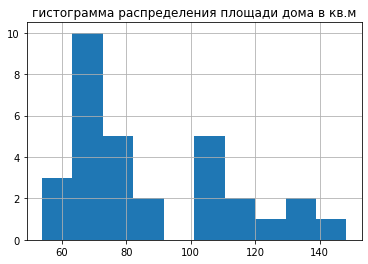

In [402]:
#Посмотрим на гистограмму распределения площади дома в кв.м
ax = df_man_36_45_age.Area_kvm.hist();
ax.set_title('гистограмма распределения площади дома в кв.м');
#Распределение напоминает нормальное, находим среднее по площади дома среди мужчин в возрасте 36-45 лет
Area_kvm = df_man_36_45_age.median()['Area_kvm']
Area_kvm #Площадь дома в кв.м. 

238811.06

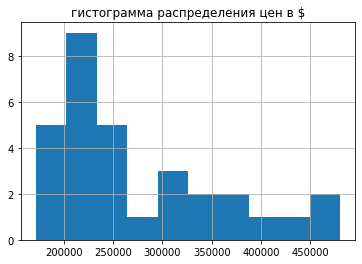

In [411]:
#Посмотрим на гистограмму распределения цены 
ax = df_man_36_45_age.Price_formating.hist()
ax.set_title('гистограмма распределения цен в $')
Price = df_man_36_45_age.Price_formating.median()
#df_Price = df.groupby(['Gender','Age_Interval','Type_of_property']).median() 
#Price = df_Price[df_Price.index == ('M', '36-45', 'Apartment')]['Price_formating'][0] # каков средний чек среди мужчин в возрасте 36-45 лет
#print(df.Price_formating.median())
Price  # Средний чек среди мужчин в возрасте 36-45 лет

'Home'

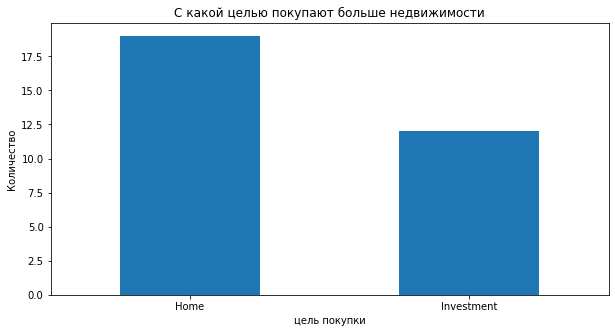

In [413]:
#количество сделок и цель покупки
df_Purpose_count = df_man_36_45_age.groupby('Purpose').count()['ID']
ax = df_Purpose_count.plot(kind='bar',rot=0, figsize=(10,5))
ax.set_title('С какой целью покупают больше недвижимости')
ax.set_xlabel('цель покупки')
ax.set_ylabel('Количество')
# Мы видим, что цель покупки Home встречается больше всего
Purpose = df_Purpose_count.idxmax()
Purpose #Цель покупки

'Website'

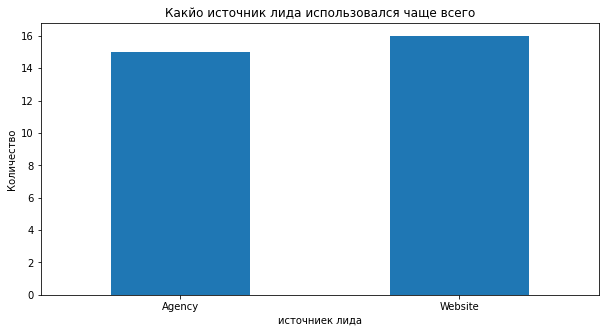

In [414]:
#количество сделок и источник лида 
df_Source_count = df_man_36_45_age.groupby('Source').count()['ID']
ax = df_Source_count.plot(kind='bar',rot=0, figsize=(10,5))
ax.set_title('Какйо источник лида использовался чаще всего')
ax.set_xlabel('источниек лида')
ax.set_ylabel('Количество')
# Мы видим, что источник лида Website встречается больше всего
Source = df_Source_count.idxmax()
Source #Источник лида

In [415]:
print('Типичный портрет целевого клиента риэлторской компании:')
print('Пол - {0}\nВозраст - {1}\nТип квартиры - {2}\nПлощадь - {3} кв.м.\nСредний чек - {4} $\nЦель покупки - {5}\nИсточник лида - {6}'.format(gender, median_age, Type_of_property, Area_kvm, Price, Purpose, Source))

Типичный портрет целевого клиента риэлторской компании:
Пол - M
Возраст - 41.0
Тип квартиры - Apartment
Площадь - 74.16263877120001 кв.м.
Средний чек - 238811.06 $
Цель покупки - Home
Источник лида - Website


In [416]:

pass
#df_Customer_Price = df[['Customer','Price_formating']].groupby('Customer').sum().sort_values(by='Price_formating', ascending=False)[:20] # Выведем первые 20 значений
#Видим, что первые три покупателя потратили много денег
#ax = df_Customer_Price.plot(kind = 'bar', figsize=(10,5)); # диаграмма покупателей и стоимости сделки. Здесь посмотрим какой клиент сколько потратил денег на недвижимость и выведим только 20 клиентов, которые потратили больше всего
#ax.set_title('диаграмма клиентов и стоимости совершенных сделки.')
#ax.set_xlabel('Customer')
#ax.set_ylabel('Price, $')

#Посмотрим сколько сделок совершил каждый клиент и выведем первые 20 максимальных значений
#df_Customer_count = df[['Customer','ID']].groupby('Customer').count().sort_values(by = 'ID',ascending=False)[:20]
#ax = df_Customer_count.plot(kind='bar', figsize=(10,5))
#ax.set_title('диаграмма клиентов и количество совершенных сделок.')
#ax.set_xlabel('Customer')
#ax.set_ylabel('Count')
"""
df_Customer_Price = df.groupby('Customer')[['Price_formating']].sum().sort_values(by = 'Price_formating',ascending=False)
df_Customer_count = df.groupby('Customer')[['ID']].count().sort_values(by = 'ID',ascending=False)
df_Customer = df_Customer_Price.join(df_Customer_count)
df_Customer.columns=['Price','Count_v']
df_Customer = df_Customer.apply(lambda x: 100*x/df_Customer.sum(), axis = 1)
df_Customer.head()


trace0 = go.Bar(
    x=df_Customer.index,
    y=df_Customer.Price,
    name='Price',
    orientation = 'v'
)

trace1 = go.Bar(
    x=df_Customer.index,
    y=df_Customer.Count_v,
    name='Count',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Platforms share'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)
"""


"\ndf_Customer_Price = df.groupby('Customer')[['Price_formating']].sum().sort_values(by = 'Price_formating',ascending=False)\ndf_Customer_count = df.groupby('Customer')[['ID']].count().sort_values(by = 'ID',ascending=False)\ndf_Customer = df_Customer_Price.join(df_Customer_count)\ndf_Customer.columns=['Price','Count_v']\ndf_Customer = df_Customer.apply(lambda x: 100*x/df_Customer.sum(), axis = 1)\ndf_Customer.head()\n\n\ntrace0 = go.Bar(\n    x=df_Customer.index,\n    y=df_Customer.Price,\n    name='Price',\n    orientation = 'v'\n)\n\ntrace1 = go.Bar(\n    x=df_Customer.index,\n    y=df_Customer.Count_v,\n    name='Count',\n    orientation = 'v'\n)\n\ndata = [trace0, trace1]\nlayout = {'title': 'Platforms share'}\n\nfig = go.Figure(data=data, layout=layout)\n\niplot(fig, show_link=False)\n"